# Linear Discriminant Analysis

We are going to implement LDA using the iris dataset. We can get the dataset from scikit-learn package. Iris is a three class dataset.

In [9]:
# importing required packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
# load iris dataset
iris=datasets.load_iris()

In [11]:
# convert dataset into a pandas dataframe
df = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                 columns = iris['feature_names'] + ['target'])
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.columns = ['s_length', 's_width', 'p_length', 'p_width', 'target', 'species']


In [12]:
df.head()

,s_length,s_width,p_length,p_width,target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


### We’ll build a linear discriminant analysis model to classify which species a given flower belongs to.
 We’ll use the following predictor variables in the model:

    Sepal length
    Sepal width
    Petal length
    Petal width
    
And we’ll use them to predict the response variable Species, which takes on the following three potential classes:

    setosa
    versicolor
    virginica

In [13]:
# fitting the model
X = df[['s_length', 's_width', 'p_length', 'p_width']]
y = df['species']

model = LinearDiscriminantAnalysis()
model.fit(X, y)

LinearDiscriminantAnalysis()

In [14]:
# evaluating the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))

0.9800000000000001


### Visualize the results

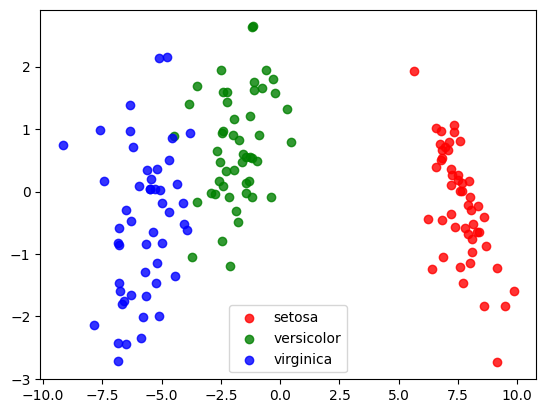

In [15]:
X = iris.data
y = iris.target
model = LinearDiscriminantAnalysis()
data_plot = model.fit(X, y).transform(X)
target_names = iris.target_names


plt.figure()
colors = ['red', 'green', 'blue']
lw = 2
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(data_plot[y == i, 0], data_plot[y == i, 1], alpha=.8, color=color,
                label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.show()

We can clearly see that the three classes are seperated and can be distinguished easily.

### Prediction
We can also use the model to predict which class a new flower belongs to, based on input values

In [16]:
# define new observation
new = [5, 2, 1, .4]

# predict which class the new observation belongs to
model.predict([new])

array([0])

The model predicts this new observation to belong to the species called setosa.